# MATH 307 Assignment 1

* See [Mathematical Python](https://patrickwalls.github.io/mathematicalpython/) for an introduction to Python and Jupyter
* See [MATH 307 Jupyter Notebooks](https://ubcmath.github.io/MATH307/) for examples
* Run the tests to verify your solutions
* There are **hidden tests** therefore your solutions may not be entirely correct even if they pass the tests below
* Submit your `.ipynb` notebook file to Canvas

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Problem 1 (2 marks)

Use the function `scipy.linalg.solve` (see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html)) to compute the solution $\mathbf{x}$ of the linear system $A_1 \mathbf{x}_1 = \mathbf{b}_1$ where

$$
A_1 = \left[ \begin{array}{rrr} 1 & 5 & 2 \\ -1 & 2 & 3 \\ 6 & -2 & -1 \end{array} \right]
\hspace{10mm}
\mathbf{b}_1 = \begin{bmatrix} 2 \\ 5 \\ 1 \end{bmatrix}
$$

Save the result as `x1`.

In [2]:
# YOUR CODE HERE
x1 = a = [[1, 5, 2],
    [-1, 2, 3],
    [6, -2, -1]]
b = [2, 5, 1]
x1 = la.solve(a,b)
x1

array([ 0.34782609, -0.52173913,  2.13043478])

In [3]:
"Verify type and size of x1. (1 mark)"
assert isinstance(x1,np.ndarray) , "x1 should be a NumPy array."
assert x1.size == 3 , "x1 should be a vector length 3."
print("Problem 1 Test 1: Success!")

Problem 1 Test 1: Success!


In [4]:
"Verify values of x1. This cell contains hidden tests. (1 mark)"
assert np.allclose(x1[0],0.34782609) , "The first entry of x1 should be 0.34782609."
print("Problem 1 Test 2: Success!")

Problem 1 Test 2: Success!


## Problem 2 (7 marks)

Consider the $N \times N$ matrix

$$
A_2 =  \left[ \begin{array}{rrrrr}
2 & -1 & & & \\
-1 & 2 & -1 & & \\
& \ddots & \ddots & \ddots & \\
& & -1 & 2 & -1 \\
& & & -1 & 2 \\
\end{array}
\right]
$$

In other words, $A_2$ is the matrix with 2 in all main diagonal entries, -1 in all upper and lower diagonal entries, and 0 everywhere else.

### Problem 2a (3 marks)

Use the function `np.diag` (see [documentation](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)) to construct the matrix $A_2$ for $N = 50$. Save the result as `A2`.

In [6]:
# YOUR CODE HERE
diagnol = 2 * np.ones(50)
lower = -1 * np.ones(50-1)
upper = -1 * np.ones(50-1)

A2 = np.diag(diagnol) + np.diag(lower, 1) + np.diag (upper, -1)
A2

array([[ 2., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  2., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  2., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  2.]])

In [7]:
"Verify type of A2. (1 mark)"
assert isinstance(A2,np.ndarray)
print("Problem 2a Test 1: Success!")

Problem 2a Test 1: Success!


In [8]:
"Verify shape of A2. (1 mark)"
assert A2.shape == (50,50) , "A2 should be a 50 by 50 matrix."
print("Problem 2a Test 2: Success!")

Problem 2a Test 2: Success!


In [9]:
"Verify values of A2. This cell contains hidden tests. (1 mark)"
assert np.allclose(A2[:2,:2],[[2,-1],[-1,2]]) , "Top left entries of A2 should be [[2,-1],[-1,2]]."
print("Problem 2a Test 3: Success!")

Problem 2a Test 3: Success!


### Problem 2b (3 marks)

Use the function `scipy.linalg.lu` (see [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html)) to compute the LU decomposition (with partial pivoting) of $A_2$ for $N = 50$. Save the result as `P2`, `L2` and `U2`. In this case, the matrix $P2$ is the identity matrix and so $A_2 = L_2 U_2$.

In [10]:
# YOUR CODE HERE
P2, L2, U2 = la.lu(A2)

In [11]:
"Verify P2 is the identity matrix. (1 mark)"
assert np.allclose(P2,np.eye(50)) , "P2 should be the identity matrix of size 50."
print("Problem 2b Test 1: Success!")

Problem 2b Test 1: Success!


In [12]:
"Verify size of L2 and U2. (1 mark)"
assert L2.shape == (50,50) , "L2 should be a 50 by 50 matrix."
assert U2.shape == (50,50) , "U2 should be a 50 by 50 matrix."
print("Problem 2b Test 2: Success!")

Problem 2b Test 2: Success!


In [13]:
"Verify values of L2 and U2. This cell contains hidden tests. (1 mark)"
assert np.allclose(L2[:2,:2],[[1,0],[-0.5,1]]) , "Top left entries of L2 should be [[1,0],[-0.5,1]]"
assert np.allclose(U2[:2,:2],[[2,-1],[0,1.5]]) , "Top left entries of U2 should be [[2,-1],[0,1.5]]"
print("Problem 2b Test 3: Success!")

Problem 2b Test 3: Success!


### Problem 2c (1 mark)

Consider the vector

$$
\mathbf{b}_2 = \begin{bmatrix} V \\ \vdots \\ V \end{bmatrix}
$$

where $V$ is a constant. Let us solve the system $A_2 \mathbf{x}_2 = \mathbf{b}_2$ (where $A_2$ is the matrix from 2(a)) in 2 ways:

1. Directly using `scipy.linalg.solve`.
2. Using the LU decomposition and the function `scipy.linalg.solve_triangular`.

Run the cells below several times and observe the results:

In [14]:
V = 12
N = 50
b2 = V*np.ones((N,1))

In [16]:
%%timeit

# Solve system directly by Gaussian elimination
x2 = la.solve(A2,b2)

101 μs ± 1.3 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [17]:
%%timeit

# Solve system with forward/backward substitution given LU decompositon 
y2 = la.solve_triangular(L2,b2,lower=True)
x2 = la.solve_triangular(U2,y2,lower=False)

50.4 μs ± 230 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


**True** or **False**: Solving the system with forward/backward substitution given the LU decomposition is faster than solving directly.

Enter your response as `observation2c`.

In [18]:
# YOUR CODE HERE
observation2c = True

In [19]:
"Verify value of observation2c. This cell contains hidden tests. (1 mark)"
assert isinstance(observation2c, bool) , "observation2c should be True or False."
print("Problem 2c Test 1: Success!")

Problem 2c Test 1: Success!


Visualize the result:

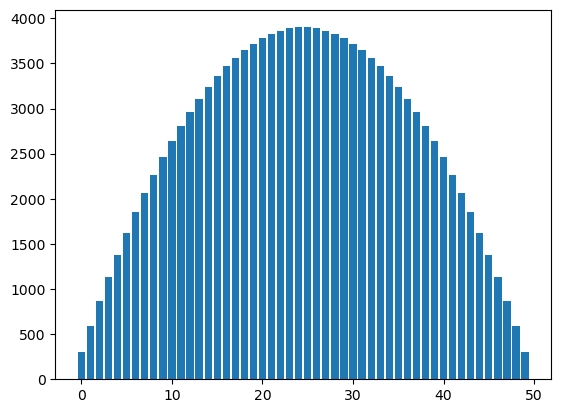

In [20]:
# Solve system with forward/backward substitution given LU decompositon 
y2 = la.solve_triangular(L2,b2,lower=True)
x2 = la.solve_triangular(U2,y2,lower=False)
plt.bar(range(len(x2)),x2.flatten())
plt.show()

## Problem 3 (4 marks)

Let $c \in \mathbb{R}$ and consider the $N \times N$ matrix

$$
A_3 =  \left[ \begin{array}{ccccc}
c & 1 & & & \\
1 & c & 1 & & \\
& \ddots & \ddots & \ddots & \\
& & 1 & c & 1 \\
& & & 1 & c \\
\end{array}
\right]
$$

Use the function `np.diag` (see [documentation](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)) to construct $A_3$. Use the function `np.linalg.cond` (see [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html)) to compute the condition number.

### Problem 3a (2 marks)

Compute the condition number of $A_3$ for $N = 20$ and $c = 8$. Save the result as `C3`.

In [21]:
# YOUR CODE HERE
diagnol_2 = 8 * np.ones(20)
lower_2 = 1 * np.ones(20-1)
upper_2 = 1 * np.ones(20-1)
A3 = np.diag(diagnol_2) + np.diag(lower_2, 1) + np.diag(upper_2, -1)

C3 = np.linalg.cond(A3)
C3

1.6567753381889914

In [22]:
"Verify type of C3. (1 mark)"
assert isinstance(C3,np.float64) , "C3 should be a NumPy float."
print("Problem 3a Test 1: Success!")

Problem 3a Test 1: Success!


In [23]:
"Verify value of C3. This cell contains hidden tests. (1 mark)"
assert np.round(C3,1) == 1.7 , "C3 should be 1.7 rounded to 1 decimal place."
print("Problem 3a Test 2: Success!")

Problem 3a Test 2: Success!


### Problem 3b (2 marks)

Compute the condition number for $A_3$ for several different values $N$ and $c$. Observe the results and answer the following question.

**True** or **False**: For any integer $N>0$, the condition number of $A_3$ converges to 1 as $c \to \infty$. Enter your response `observation3b` as either **True** or **False**.

In [24]:
# YOUR CODE HERE
observation3b = True

In [25]:
"Verify type of observation3b. (1 mark)"
assert isinstance(observation3b,bool) , "observation3b should be either True or False"
print("Problem 3b Test 1: Success!")

Problem 3b Test 1: Success!


In [26]:
"Verify value of observation3b. This cell contains hidden tests. (1 mark)"
assert isinstance(observation3b,bool) , "observation3b should be either True or False"
print("Problem 3b Test 2: Success!")

Problem 3b Test 2: Success!


## Problem 4 (2 marks)

Find the smallest (positive) integer $N$ such that the Vandermonde matrix for data points $t_0=0,\dots,t_N=N$ has condition number greater than $10^{10}$. Save the result as `N4`. Use `np.vander` to create the Vandermonde matrix. See the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.vander.html). Use the function `np.linalg.cond` to compute the condition number. See the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html).

In [27]:
# YOUR CODE HERE
N = 1

while True:
    t = np.arange(N + 1) 
    vander = np.vander(t)
    if np.linalg.cond(vander) > 10**10:
        N4 = N
        break
    N += 1

N4

9

In [28]:
"Verify type of N4. (1 mark)"
assert isinstance(N4,int) , "N4 should be an integer"
print("Problem 4 Test 1: Success!")

Problem 4 Test 1: Success!


In [29]:
"Verify value of N4. This cell contains hidden tests. (1 mark)"
assert N4 > 0 , "N4 should be an integer"
print("Problem 4 Test 2: Success!")

Problem 4 Test 2: Success!


## Problem 5 (3 marks)

The data in the cell below records the average daily temperature in [Alert, Nunavut](https://en.wikipedia.org/wiki/Alert,_Nunavut) in April 2006 (see [Environment and Climate Change Canada](https://climate.weather.gc.ca)). Note that there are days with missing data. The goal of this exercise is to interpolate the data with a natural cubic spline and predict the temperature on the days without a measurement.

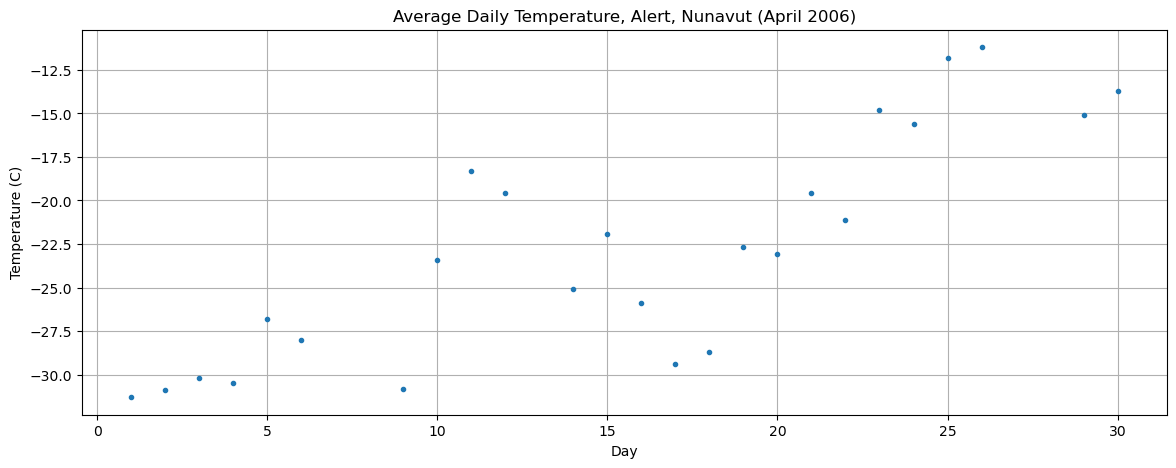

In [30]:
day = [1,2,3,4,5,6,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,29,30]
temperature = [-31.3,-30.9,-30.2,-30.5,-26.8,-28.0,-30.8,-23.4,-18.3,-19.6,-25.1,-21.9,-25.9,-29.4,-28.7,-22.7,-23.1,-19.6,-21.1,-14.8,-15.6,-11.8,-11.2,-15.1,-13.7]

plt.figure(figsize=(14,5))
plt.plot(day,temperature,'.')
plt.title('Average Daily Temperature, Alert, Nunavut (April 2006)')
plt.xlabel('Day'), plt.ylabel('Temperature (C)')
plt.grid(True)
plt.show()

### Problem 5a (2 marks)

Use the function `scipy.interpolate.CubicSpline` to compute the natural cubic spline of the data. Save the result as `p5`. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html). Note that the natural cubic spline condition requires `bc_type='natural'`.

In [32]:
from scipy.interpolate import CubicSpline
# YOUR CODE HERE
p5 = CubicSpline (day, temperature, bc_type = "natural")

In [33]:
"Verify type of p5. (1 mark)"
assert isinstance(p5,CubicSpline) , "p5 should be a CubicSpline object."
print("Problem 5a Test 1: Success!")

Problem 5a Test 1: Success!


In [34]:
"Verify the coefficient matrix of p5. This cell contains hidden tests. (1 mark)"
assert p5.c.shape == (4,24) , "Coefficient of matrix should be 4 by 24."
print("Problem 5a Test 2: Success!")

Problem 5a Test 2: Success!


Plot the cubic spline with the data.

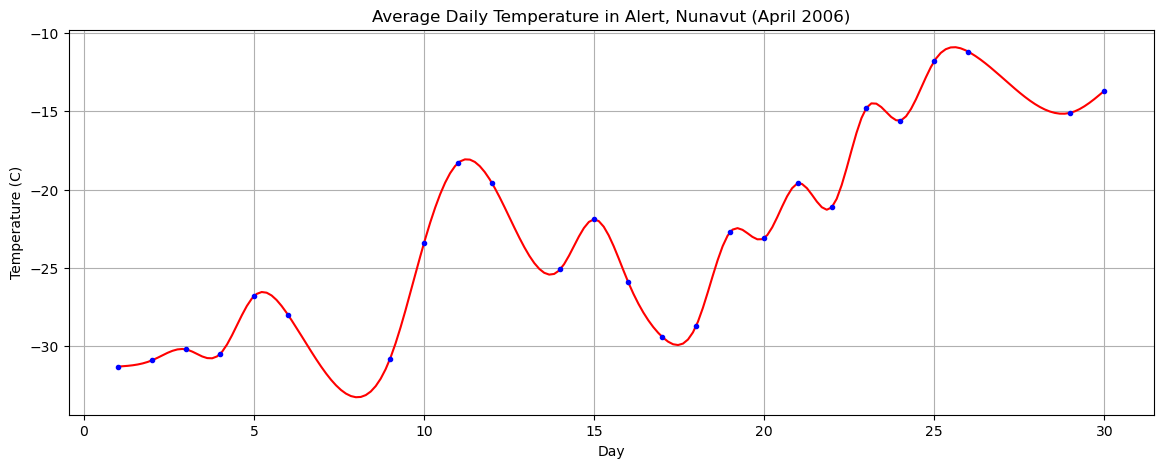

In [35]:
plt.figure(figsize=(14,5))
d = np.linspace(1,30,200)
t = p5(d)
plt.plot(d,t,'r')
plt.plot(day,temperature,'.b')
plt.title('Average Daily Temperature in Alert, Nunavut (April 2006)')
plt.xlabel('Day'), plt.ylabel('Temperature (C)')
plt.grid(True)
plt.show()

### Problem 5b (1 mark)

We can use the cubic spline object `p5` as a function to compute the temperature at any point. Compute the temperature for `d = 27` and assign the result to `T27`.

In [36]:
# YOUR CODE HERE
T27 =p5 (27)
T27

array(-12.85652468)

In [37]:
"Verify the value of T27. This cell contains hidden tests. (1 mark)"
assert T27 < 0 , "The temperature should be below 0."
print("Problem 5b Test 1: Success!")

Problem 5b Test 1: Success!


## Problem 6 (6 marks)

The goal of this problem is to find the unique function of the form

$$
f(t) = c_0 + c_1 \cos(\pi t) + c_2 \cos(2 \pi t) + c_3 \cos(3 \pi t) + c_4 \cos(4 \pi t) + c_5 \cos(5 \pi t)
$$

which interpolates the data

$$
(0.0,0.86198775) \ , \ (0.2,0.42221378) \ , \ (0.4,0.67085031) \ , \ (0.6,0.81337281) \ , \ (0.8,0.06133098) \ , \ (1.0,0.18599908)
$$

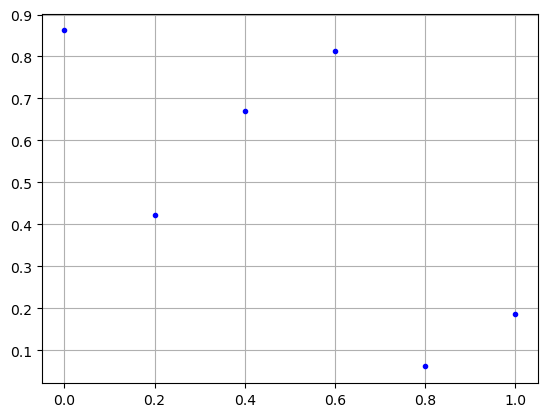

In [38]:
t = [ 0.0, 0.2, 0.4, 0.6, 0.8, 1.0 ]
y = [ 0.86198775, 0.42221378, 0.67085031, 0.81337281, 0.06133098, 0.18599908 ]
plt.plot(t,y,'b.'), plt.grid(True)
plt.show()

### Problem 6a (3 marks)

Copy/paste/modify the code below to create the matrix $A_6$ such that the solution of $A_6 \mathbf{c} = \mathbf{y}$ is the vector $\mathbf{c}$ of coefficients (and $\mathbf{y}$ is the vector of $y$ values)

$$
\mathbf{c} = \begin{bmatrix} c_0 \\ c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \end{bmatrix}
\hspace{1in}
\mathbf{y} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5 \end{bmatrix}
$$

```
t = np.linspace(0,1,3)
A6 = np.stack([np.ones(3),np.cos(np.pi*t),np.cos(2*np.pi*t)],axis=1)
```

In [39]:
# YOUR CODE HERE
t = np.linspace (0,1,6)
A6 = np.stack([np.ones(6),np.cos(np.pi*t),np.cos(2*np.pi*t), np.cos(3*np.pi*t),np.cos(4*np.pi*t),np.cos(5*np.pi*t)],axis=1)

In [40]:
"Verify the type of A6. (1 mark)"
assert isinstance(A6,np.ndarray) , "A6 should be a NumPy array."
print("Problem 6a Test 1: Success!")

Problem 6a Test 1: Success!


In [41]:
"Verify the shape of A6. (1 mark)"
assert A6.shape == (6,6), "A6 should be a 6 by 6 NumPy array."
print("Problem 6a Test 2: Success!")

Problem 6a Test 2: Success!


In [42]:
"Verify values of A1. This cell contains hidden tests. (1 mark)"
assert np.allclose(A6[:2,:2],[[1,1],[1,0.80901699]]) , "Top left entries of A6 shold be [[1,1],[1,0.80901699]]."
print("Problem 6a Test 3: Success!")

Problem 6a Test 3: Success!


### Problem 6b (3 marks)

Use `scipy.linalg.solve` to compute the solution $\mathbf{c}$. Save the result as `c6`.

In [44]:
# YOUR CODE HERE
c6 = la.solve(A6, y)

In [45]:
"Verify the type of c6. (1 mark)"
assert isinstance(c6,np.ndarray) , "c6 should be a NumPy array"
print("Problem 6b Test 1: Success!")

Problem 6b Test 1: Success!


In [46]:
"Verify the size of c6. (1 mark)"
assert c6.size == 6 , "c6 should have length 6."
print("Problem 6b Test 2: Success!")

Problem 6b Test 2: Success!


In [47]:
"Verify values of c6. This cell contains hidden tests. (1 mark)"
assert np.allclose(c6[0],0.49835226) , "First coefficient of c6 should be 0.49835226."
print("Problem 6b Test 3: Success!")

Problem 6b Test 3: Success!


Plot the result to see how the function fits the data:

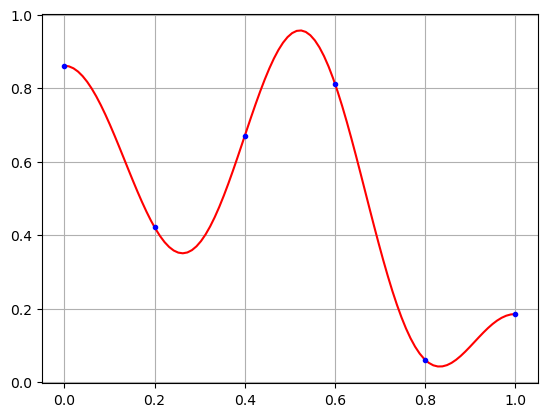

In [48]:
t = [ 0.0, 0.2, 0.4, 0.6, 0.8, 1.0 ]
y = [ 0.86198775, 0.42221378, 0.67085031, 0.81337281, 0.06133098, 0.18599908 ]
T = np.linspace(0,1,100)
Y = sum([c6[k]*np.cos(k*np.pi*T) for k in range(0,len(c6))])
plt.plot(T,Y,'r',t,y,'b.'), plt.grid(True)
plt.show()